Dataset loaded successfully.
First 5 rows:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Wi

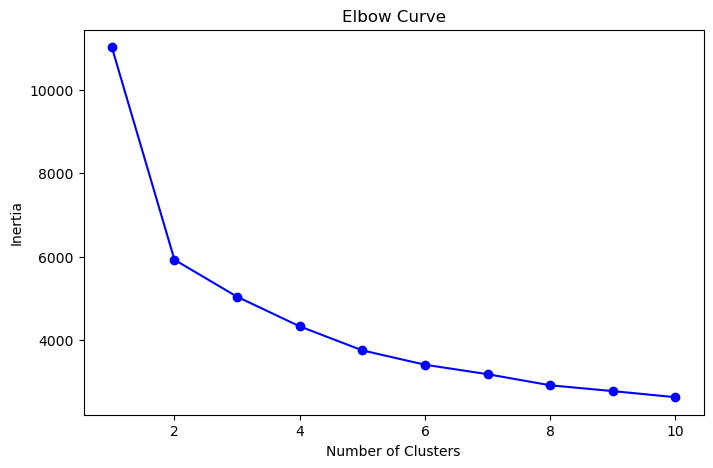

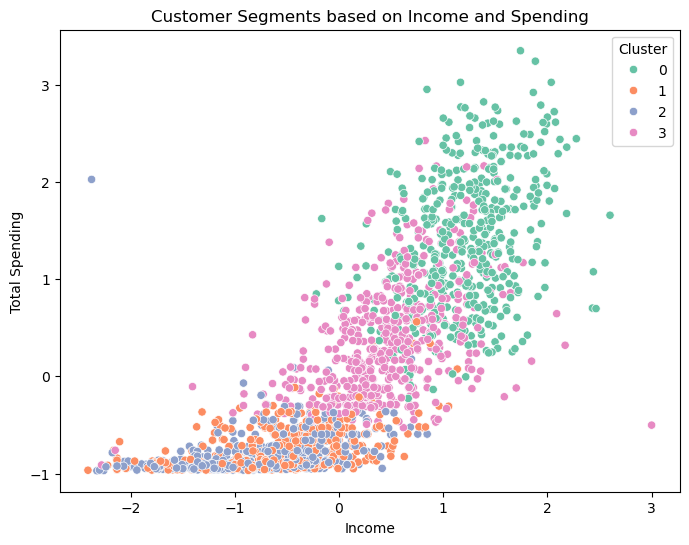

Cluster centroids:
[[ 1.20532284  0.03343317  1.376479    0.10922311  0.859828  ]
 [-0.69309715  0.93033127 -0.76549605 -0.59892577 -0.69714209]
 [-0.83187013 -0.828142   -0.80949278 -0.7008493  -0.77378455]
 [ 0.45549045 -0.06927464  0.35079768  1.19784551  0.70453306]]
Cluster analysis:
           Income   Recency  MntTotal  NumWebPurchases  NumStorePurchases
Cluster                                                                  
0        1.205323  0.033433  1.376479         0.109223           0.859828
1       -0.693143  0.931975 -0.765388        -0.599287          -0.696823
2       -0.831591 -0.826673 -0.809518        -0.700340          -0.773950
3        0.455490 -0.069275  0.350798         1.197846           0.704533


In [3]:

# Customer Segmentation Analysis

## Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Step 2: Load the Dataset
data = pd.read_csv(r"C:\Users\maxwe\OneDrive\Desktop\ifood_df.csv")
print("Dataset loaded successfully.")

# Display dataset overview
print("First 5 rows:")
print(data.head())
print("Data information:")
print(data.info())

## Step 3: Data Exploration and Cleaning
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Drop columns that aren't needed for clustering (if necessary)
columns_to_drop = ["Z_CostContact", "Z_Revenue"]  # Example unnecessary columns
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

# Normalize numerical features
numeric_features = ["Income", "Recency", "MntTotal", "NumWebPurchases", "NumStorePurchases"]
scaler = StandardScaler()
data_cleaned[numeric_features] = scaler.fit_transform(data_cleaned[numeric_features])

## Step 4: Descriptive Statistics
print("Descriptive statistics:")
print(data_cleaned.describe())

## Step 5: Apply K-Means Clustering
# Find the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned[numeric_features])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Fit K-Means with the chosen number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned[numeric_features])

## Step 6: Visualizations
# Visualize the clusters (using PCA for dimensionality reduction if needed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned["Income"], y=data_cleaned["MntTotal"], hue=data_cleaned["Cluster"], palette="Set2")
plt.title("Customer Segments based on Income and Spending")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.legend(title="Cluster")
plt.show()

## Step 7: Insights and Recommendations
# Analyze clusters
print("Cluster centroids:")
print(kmeans.cluster_centers_)
print("Cluster analysis:")
print(data_cleaned.groupby("Cluster")[numeric_features].mean())
